# Machine Learning Task
## Regression and Classification

### Summary
Design a Python-based Machine Learning application using the Infrared Thermography Temperature Dataset to predict oral temperatures measured in fast and monitor modes, and to classify fever cases, utilizing various environmental factors and thermal image readings.

### Goal
Develop a robust ML model capable of accurately predicting oral temperatures and detecting fever based on the provided dataset, employing regression for temperature prediction and classification for fever identification.

### Roadmap:
1. **Data Exploration and Preparation:**
   - Analyze the dataset's structure and features.
   - Handle missing values and outliers.
   - Explore correlations between variables.

2. **Model Selection and Training:**
   - Experiment with different regression algorithms (e.g., linear regression, polynomial regression, neural networks) for temperature prediction.
   - Explore classification algorithms (e.g., logistic regression, decision trees, random forests) for fever detection.
   - Utilize the XGBoost algorithm, especially for MSc students.

3. **Model Evaluation and Optimization:**
   - Evaluate models using appropriate metrics for regression (e.g., mean squared error, R-squared) and classification (e.g., accuracy, precision, recall, F1-score).
   - Optimize hyperparameters using techniques like grid search or random search.
   - Consider feature importance analysis to identify predictive variables.

4. **Interpretation and Presentation:**
   - Provide clear explanations of the methodology used.
   - Interpret findings regarding model performance and insights gained from interpretable models.
   - Present results in a Jupyter notebook with relevant explanations and insights.


### Setup

In [186]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To Train Model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split


# Notebook Setting
pd.set_option('display.max_columns', None)

### Get the Data

In [4]:
!pip3 install -U ucimlrepo 

In [357]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets
df = infrared_thermography_temperature.data.original

In [11]:
infrared_thermography_temperature.metadata

{'uci_id': 925,
 'name': 'Infrared Thermography Temperature',
 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv',
 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ',
 'area': 'Health and Medicine',
 'tasks': ['Regression'],
 'characteristics': ['Tabular'],
 'num_instances': 1020,
 'num_features': 33,
 'feature_types': ['Real', 'Categorical'],
 'demographics': ['Gender', 'Age', 'Ethnicity'],
 'target_

In [12]:
infrared_thermography_temperature.variables

,name,role,type,demographic,description,units,missing_values
0,SubjectID,ID,Categorical,None,Subject ID,None,no
1,aveOralF,Target,Continuous,None,Oral temperature measured in fast mode,None,no
2,aveOralM,Target,Continuous,None,Oral temperature measured in monitor mode,None,no
3,Gender,Feature,Categorical,Gender,Male or Female,None,no
4,Age,Feature,Categorical,Age,Age ranges in categories\n,None,no
5,Ethnicity,Feature,Categorical,Ethnicity,"American Indian or Alaska Native, Asian, Black...",None,no
6,T_atm,Feature,Continuous,None,Ambiant temperature,None,no
7,Humidity,Feature,Continuous,None,Relative humidity,None,no
8,Distance,Feature,Continuous,None,Distance between the subjects and the IRTs.,None,no
9,T_offset1,Feature,Continuous,None,Temperature difference between the set and mea...,None,no


## Exploratory Data Analysis (EDA)

In [66]:
# df is a pandas dataframe contains all the features and targets together
df.head()

,SubjectID,aveOralF,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,161117-1,36.85,36.59,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.3375,35.3375,34.4850,35.3775,34.7850,34.4650,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,161117-2,37.00,37.19,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,161117-3,37.20,37.34,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,161117-4,36.85,37.09,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,161117-5,36.80,37.04,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [18]:
df.info()

# there is no null values in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SubjectID    1020 non-null   object 
 1   aveOralF     1020 non-null   float64
 2   aveOralM     1020 non-null   float64
 3   Gender       1020 non-null   object 
 4   Age          1020 non-null   object 
 5   Ethnicity    1020 non-null   object 
 6   T_atm        1020 non-null   float64
 7   Humidity     1020 non-null   float64
 8   Distance     1018 non-null   float64
 9   T_offset1    1020 non-null   float64
 10  Max1R13_1    1020 non-null   float64
 11  Max1L13_1    1020 non-null   float64
 12  aveAllR13_1  1020 non-null   float64
 13  aveAllL13_1  1020 non-null   float64
 14  T_RC1        1020 non-null   float64
 15  T_RC_Dry1    1020 non-null   float64
 16  T_RC_Wet1    1020 non-null   float64
 17  T_RC_Max1    1020 non-null   float64
 18  T_LC1        1020 non-null   float64
 19  T_LC_D

In [55]:
def value_couts_plot(df, column, figsize=(4,2), rotation=45):
    print(df[column].value_counts())
    print("-"*50)
    plt.figure(figsize=figsize)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=rotation)
    plt.show();

Age
18-20    534
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: count, dtype: int64
--------------------------------------------------


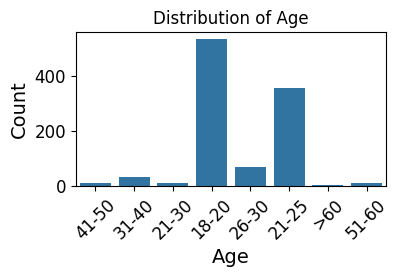

In [50]:
value_couts_plot(df, 'Age')

Gender
Female    606
Male      414
Name: count, dtype: int64
--------------------------------------------------


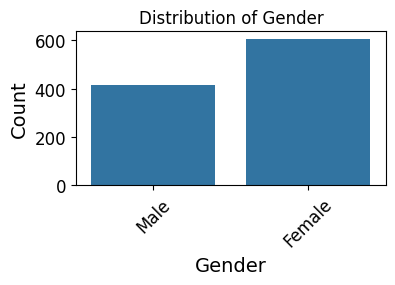

In [51]:
value_couts_plot(df, 'Gender')

Ethnicity
White                                506
Asian                                260
Black or African-American            143
Hispanic/Latino                       57
Multiracial                           50
American Indian or Alaskan Native      4
Name: count, dtype: int64
--------------------------------------------------


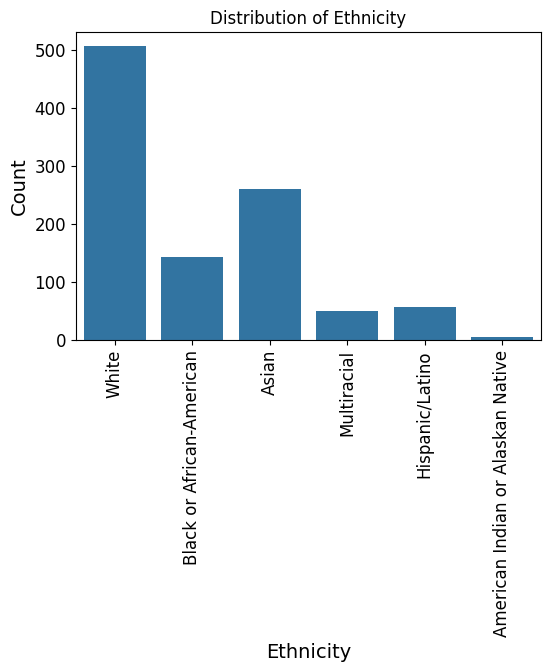

In [54]:
value_couts_plot(df, 'Ethnicity', figsize=(6,4), rotation=90)

In [57]:
# numeric variable describe
df.describe()

,aveOralF,aveOralM,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,36.979216,37.028382,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,35.547315,35.689762,35.640851,35.610869,35.468624,35.670962,35.253563,35.208961,35.787509,35.758025,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,0.386403,0.509502,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,0.568828,0.553594,0.541169,0.545645,0.566434,0.540748,0.605968,0.584393,0.533453,0.533313,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,35.750000,35.540000,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,33.932500,34.002500,34.105000,34.105000,33.730000,34.122500,33.617500,33.385000,34.375000,34.352500,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,36.800000,36.777500,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,35.210000,35.360000,35.309375,35.278750,35.127500,35.331875,34.886250,34.863750,35.455000,35.426875,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,36.900000,36.940000,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,35.482500,35.631250,35.597500,35.572500,35.425000,35.626250,35.203750,35.167500,35.713750,35.686250,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,37.100000,37.140000,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,35.808125,35.940625,35.895000,35.863125,35.755000,35.922500,35.562500,35.498125,36.030625,36.002500,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,39.600000,40.340000,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,38.330000,38.407500,38.042500,38.037500,37.960000,38.075000,38.155000,37.827500,38.407500,38.382500,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


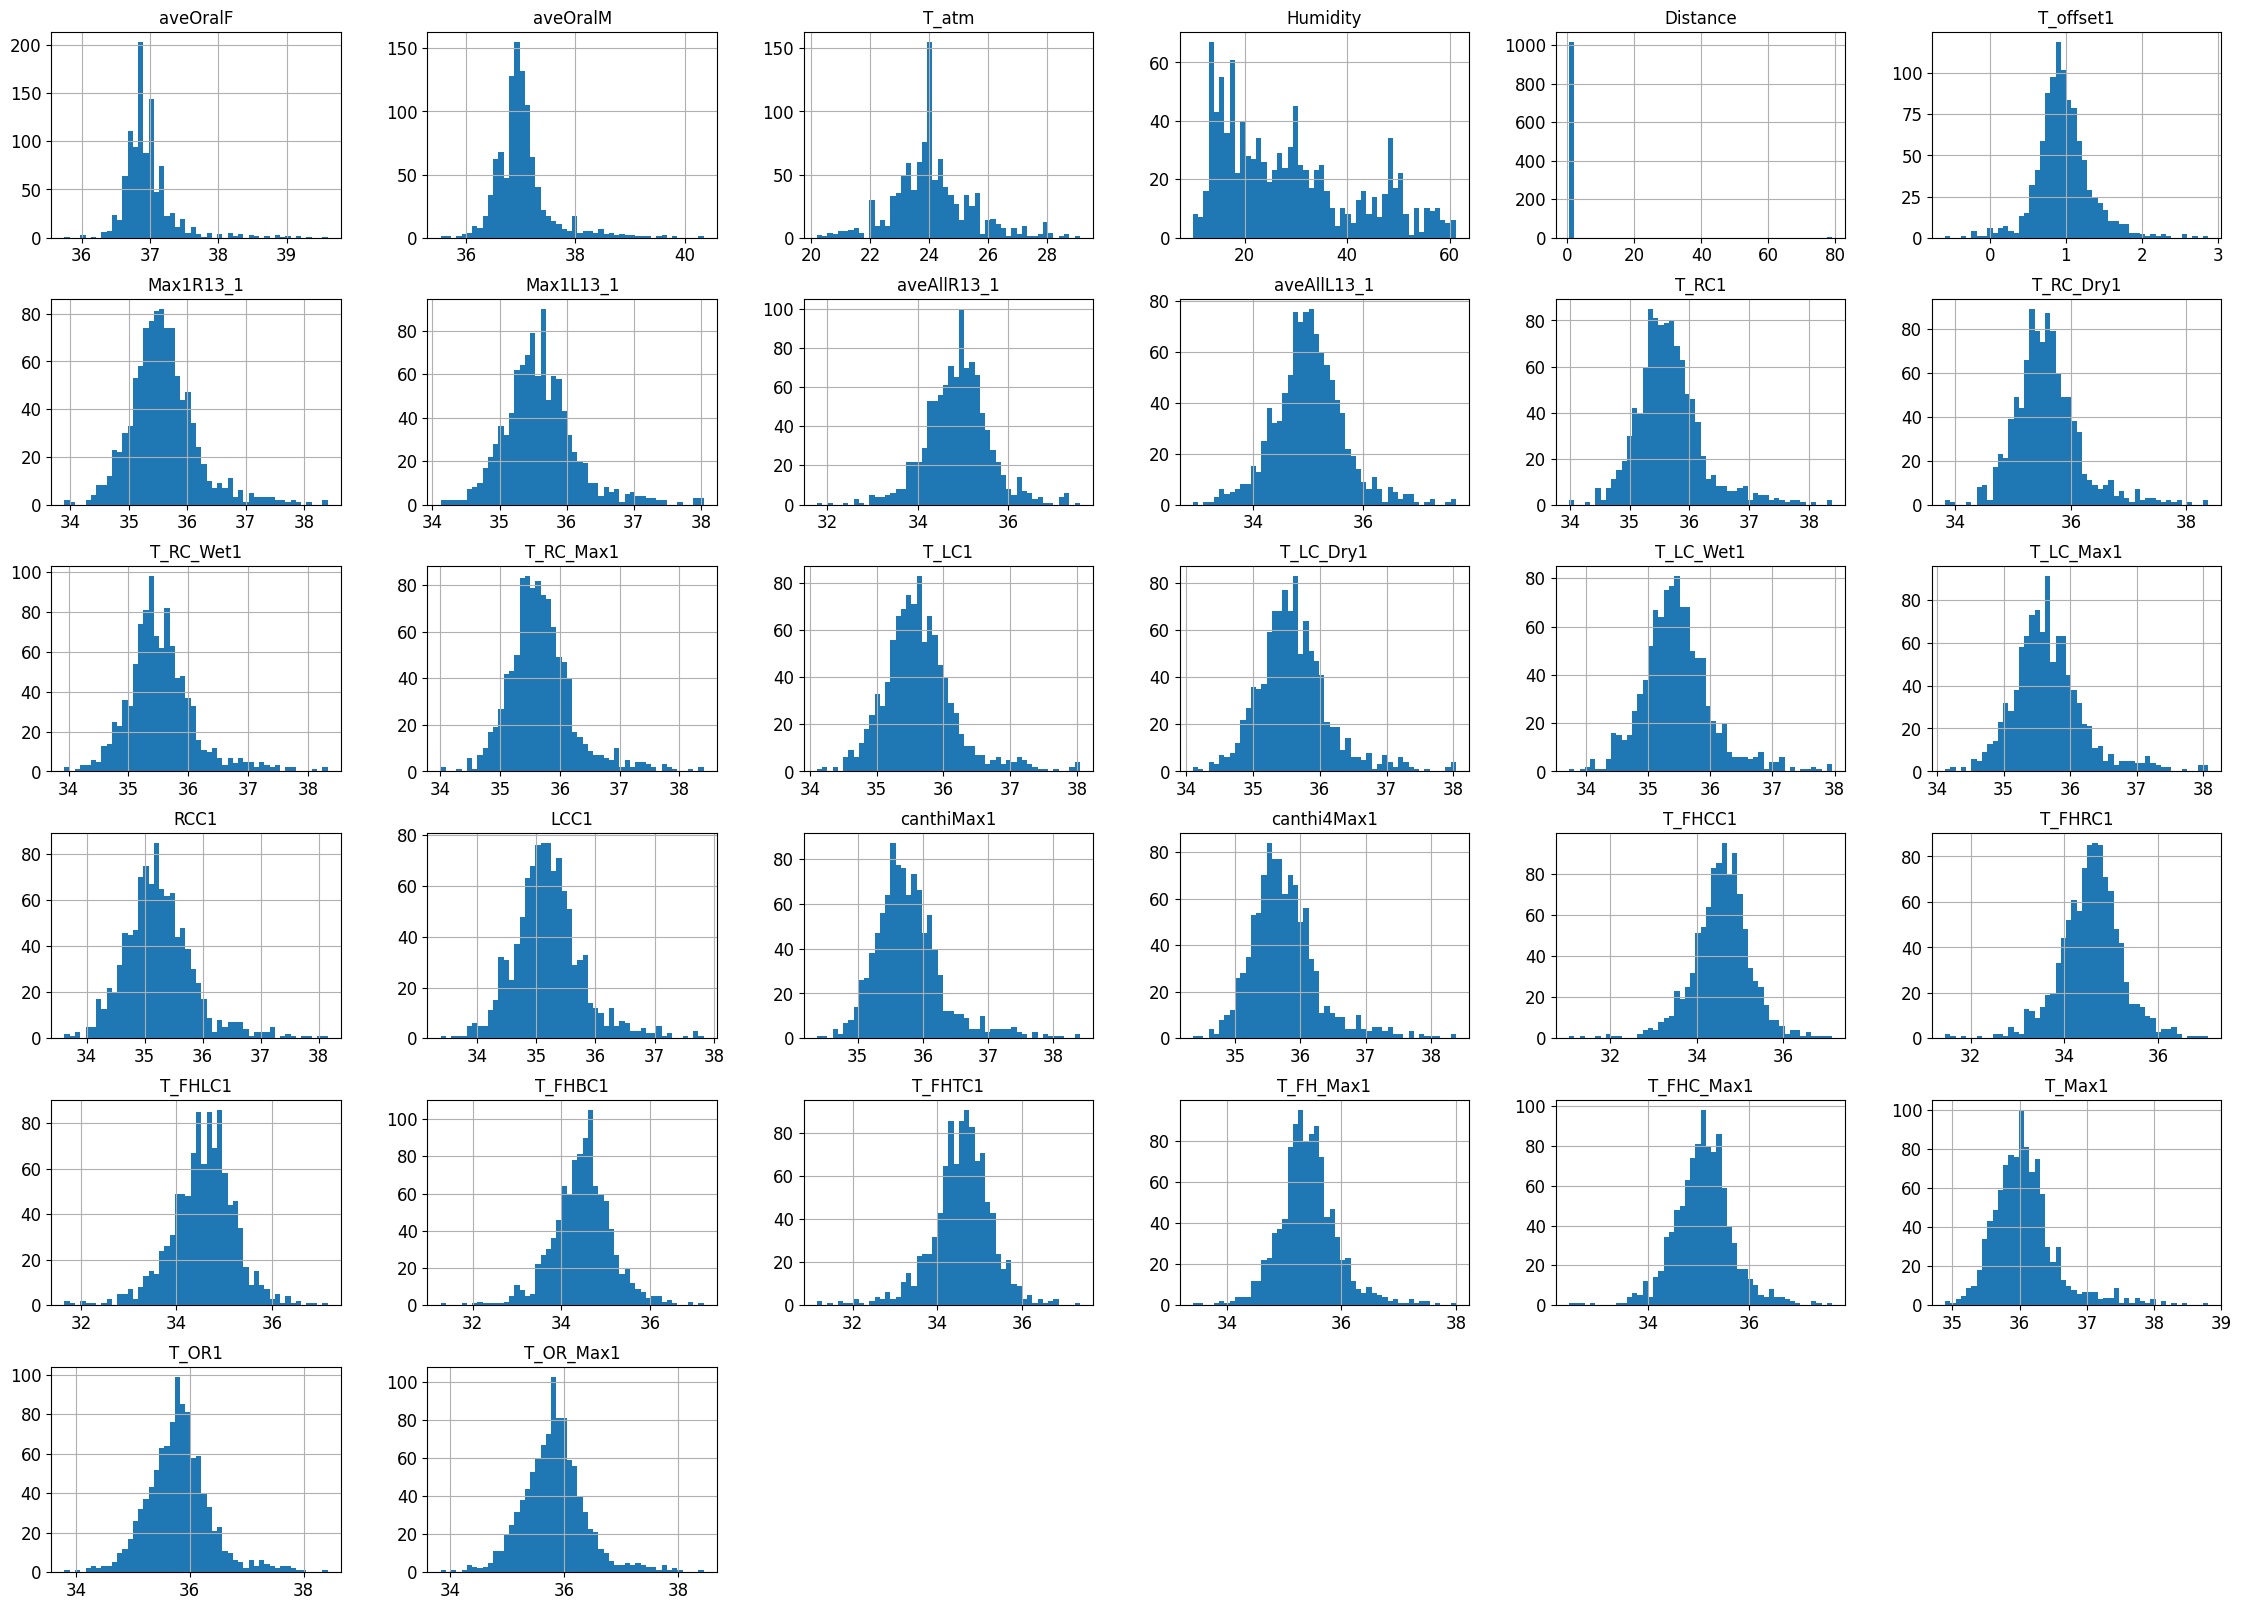

In [67]:
df.hist(bins=50, figsize=(28,20))
plt.show();

# it seems most of the features have are in normal distribution but Distance

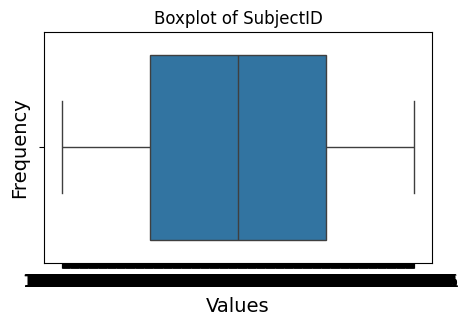

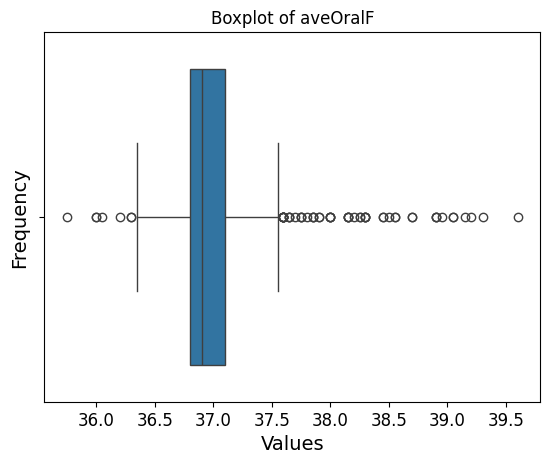

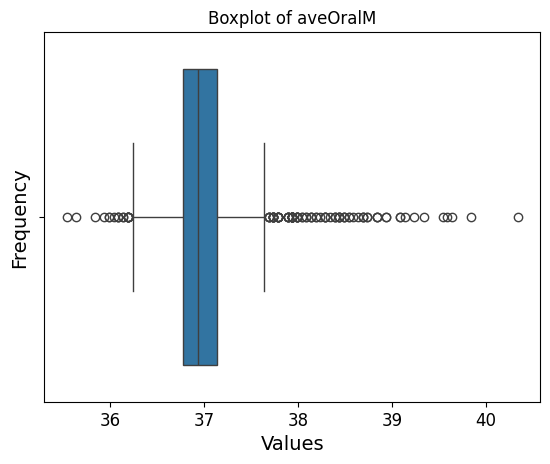

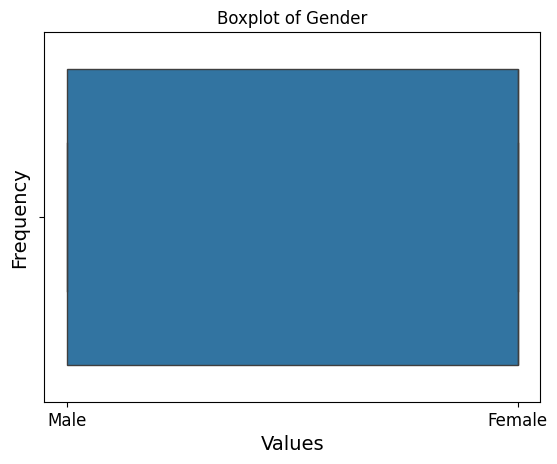

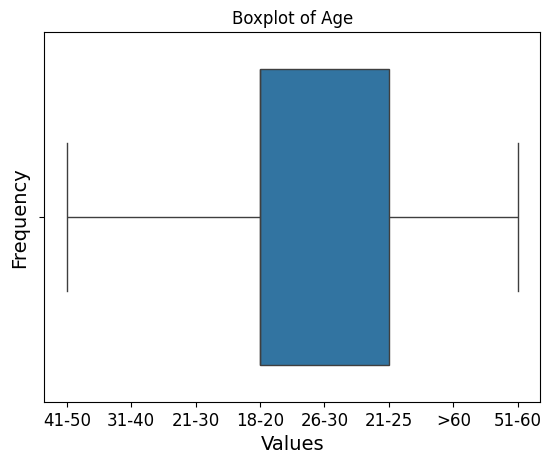

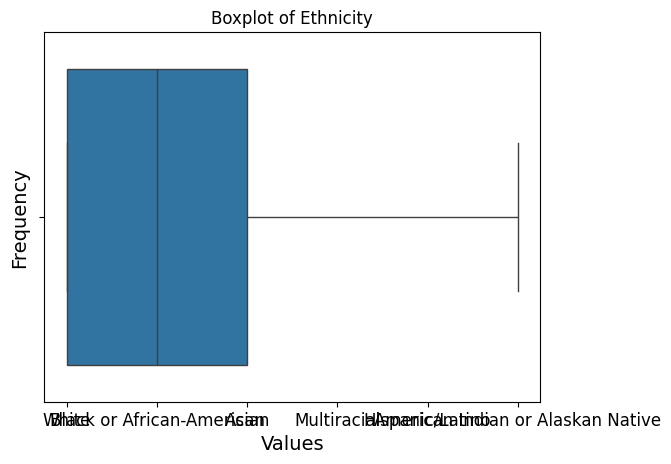

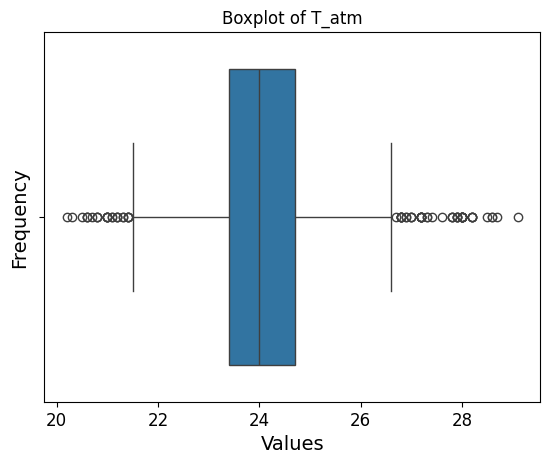

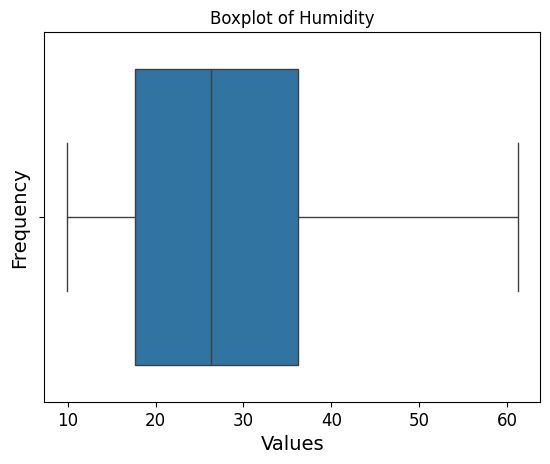

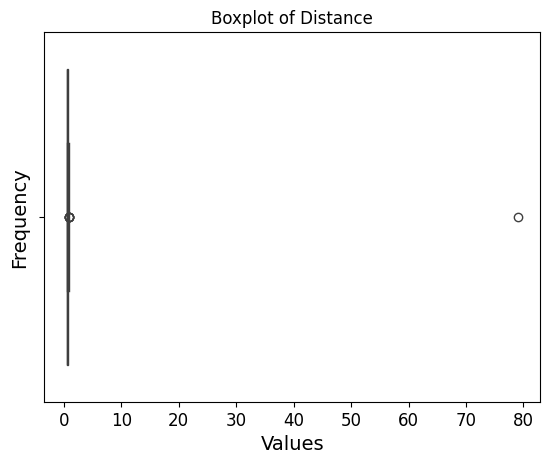

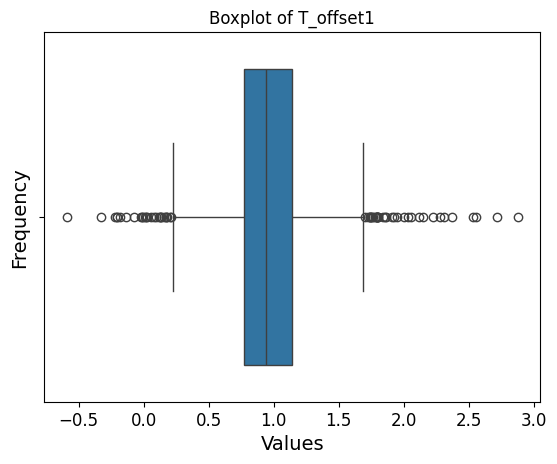

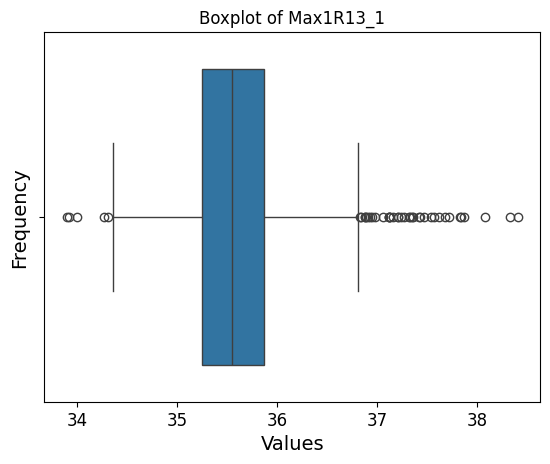

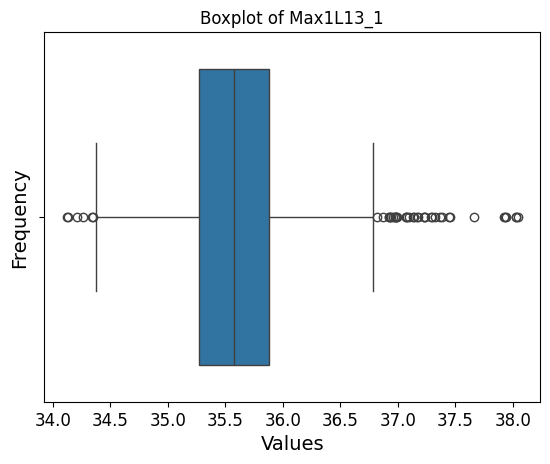

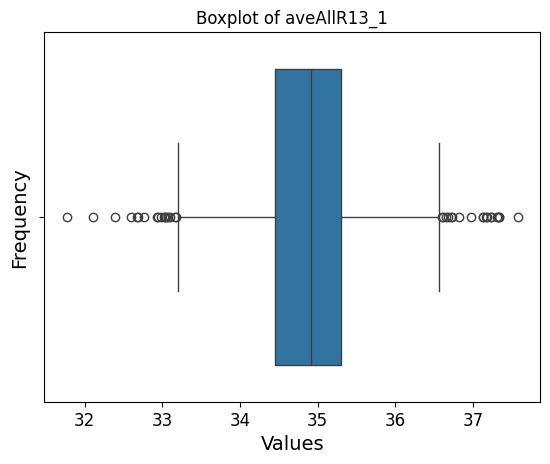

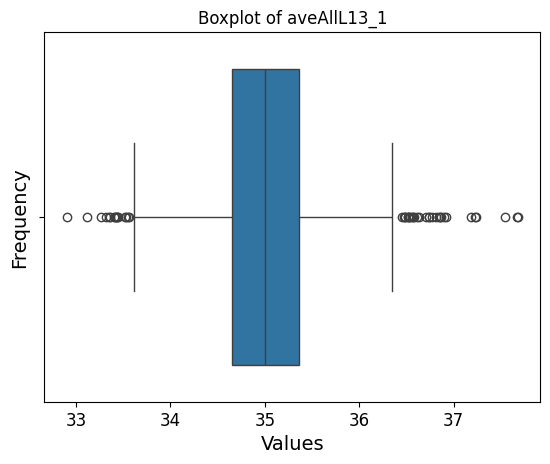

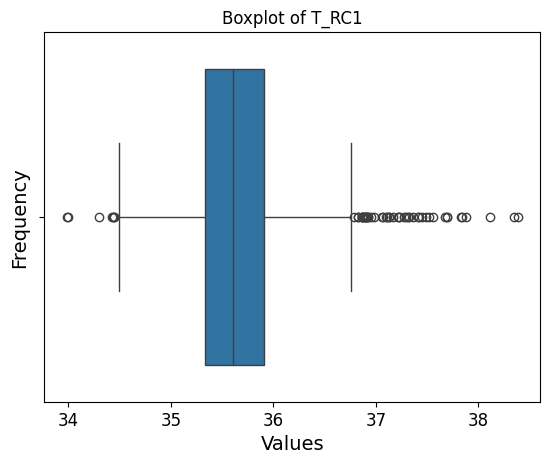

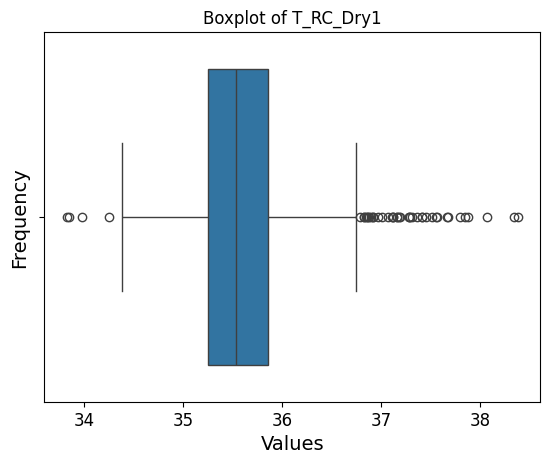

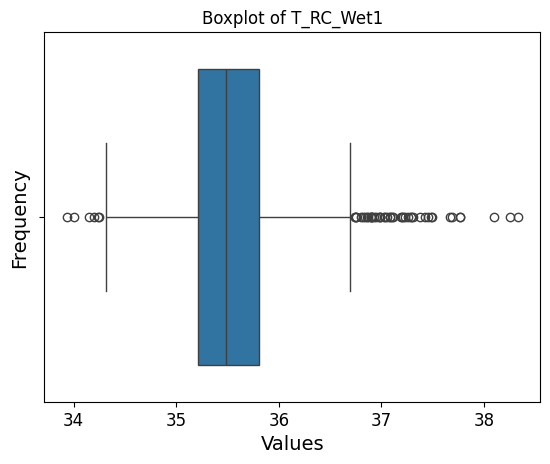

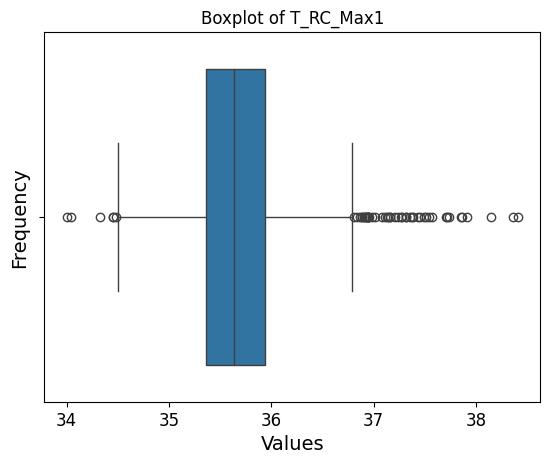

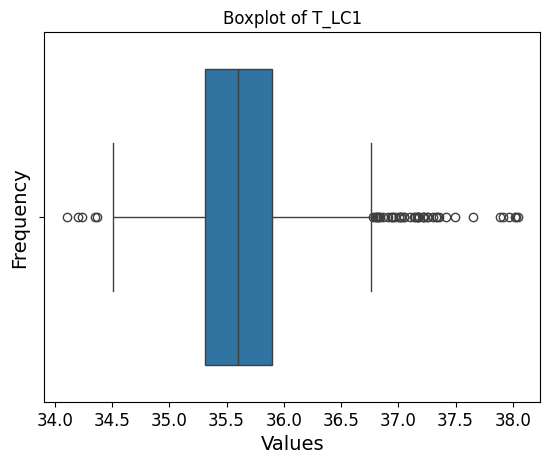

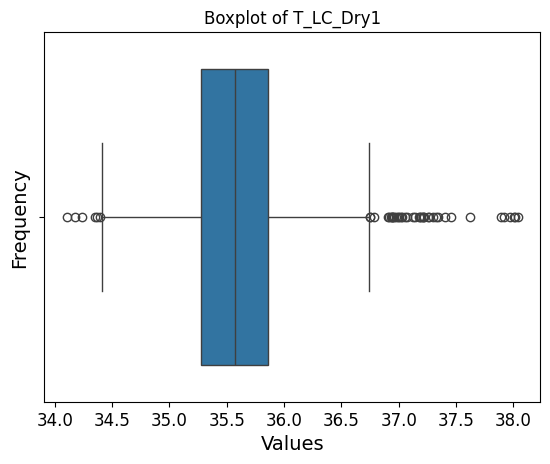

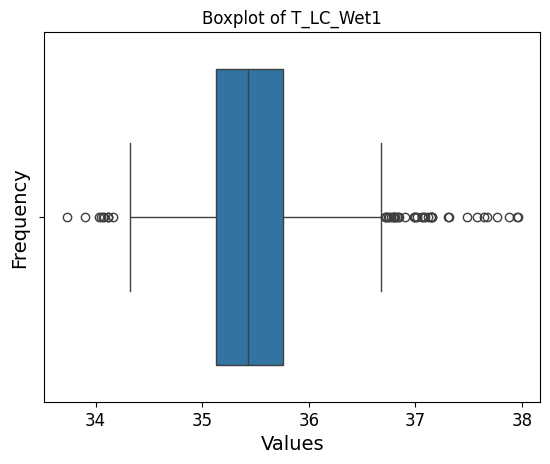

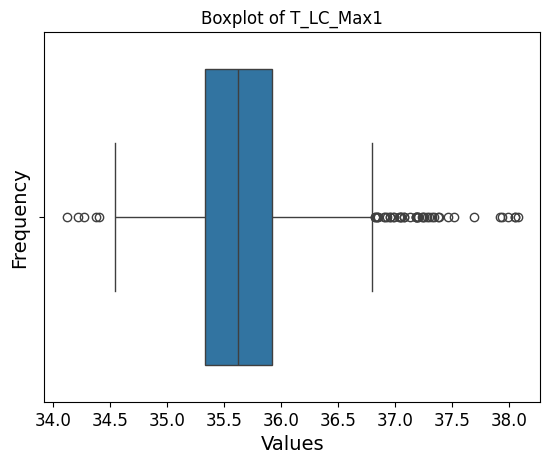

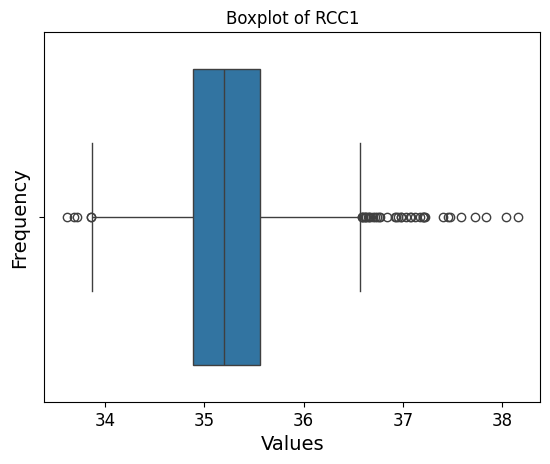

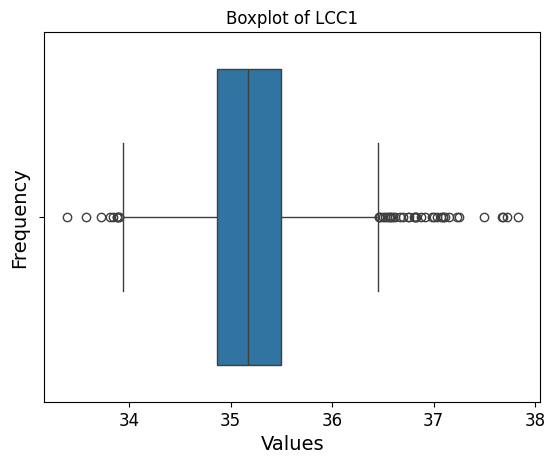

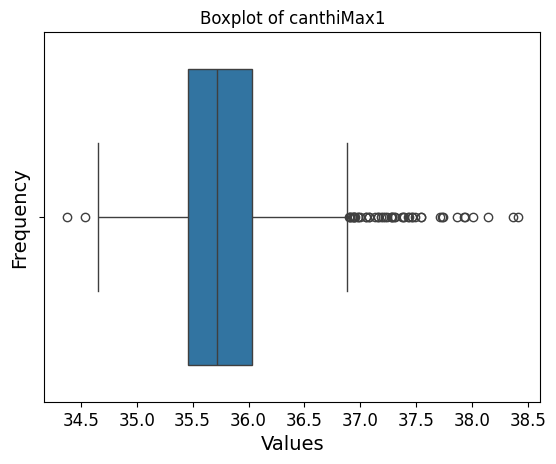

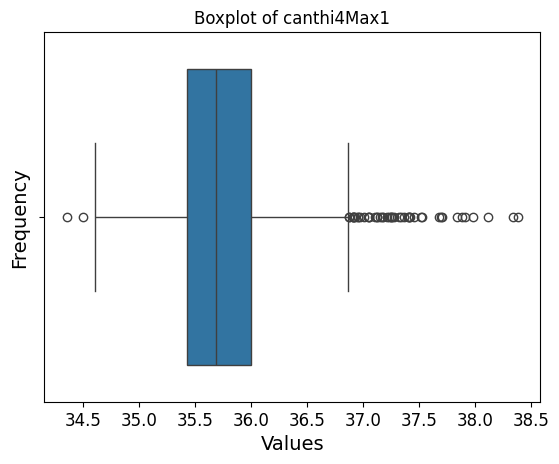

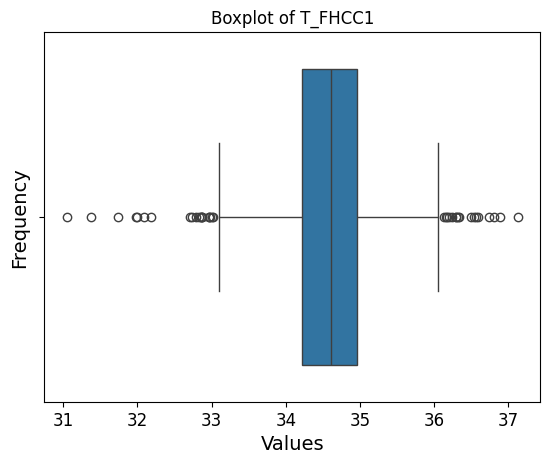

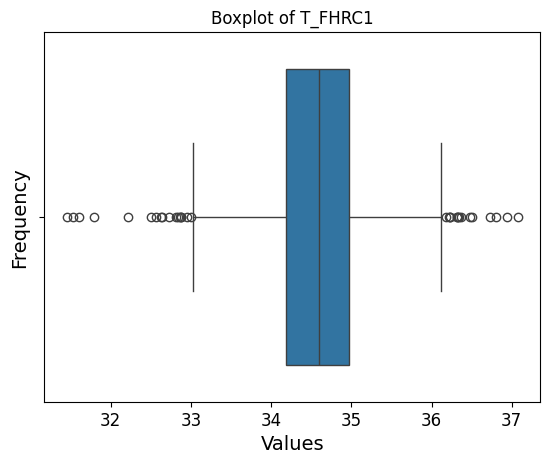

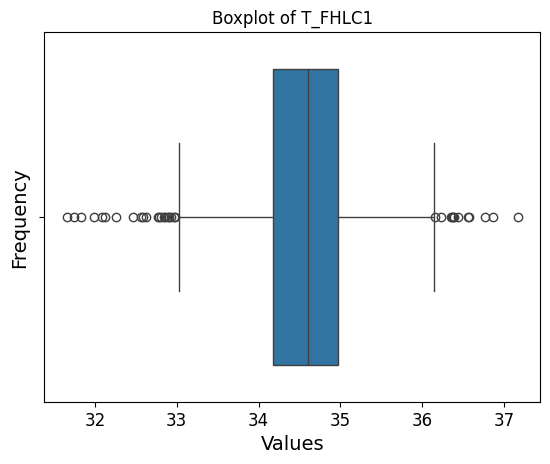

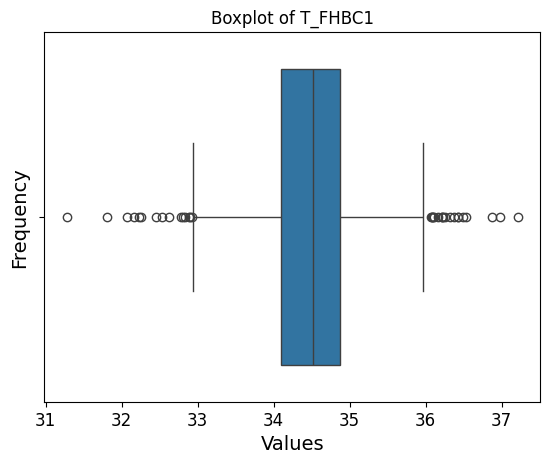

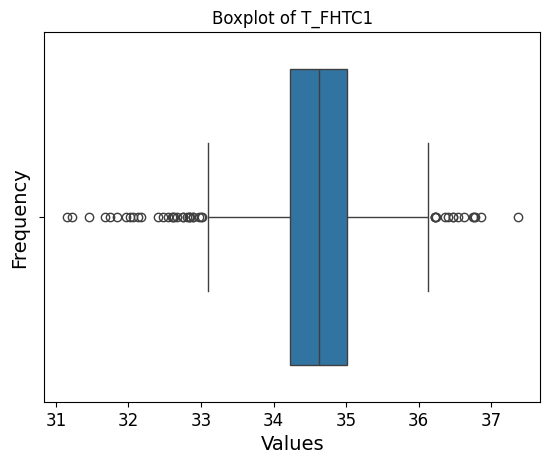

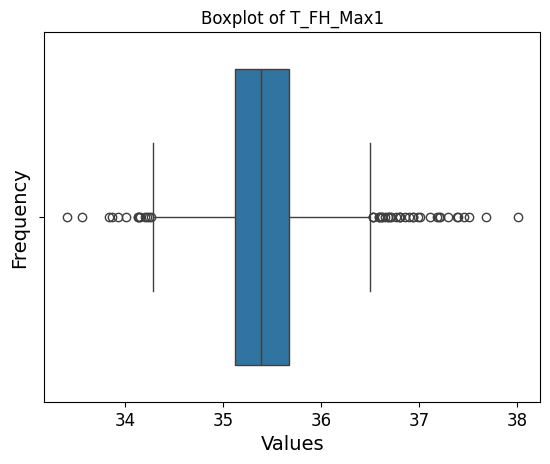

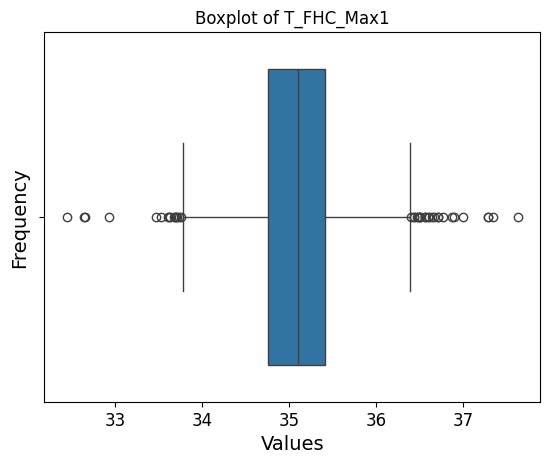

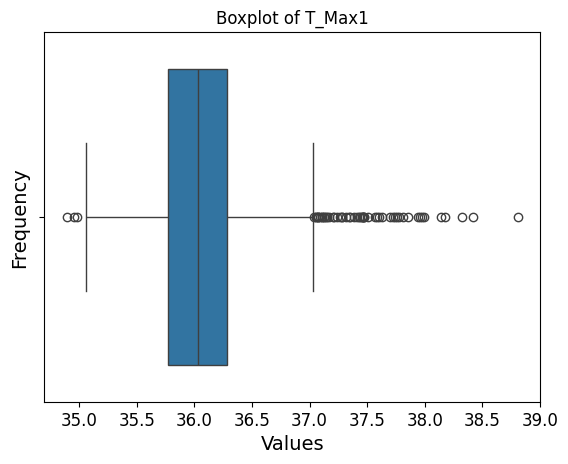

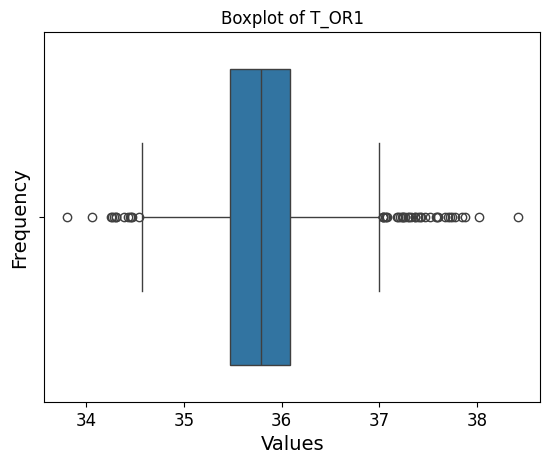

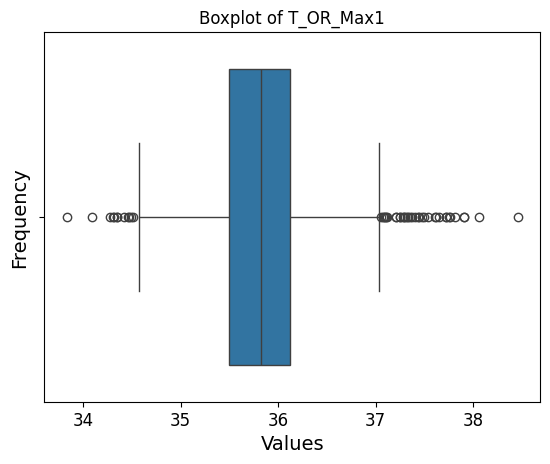

In [70]:
# lets check outliers with boxplot
plt.figure(figsize=(5, 3))

# Loop through each column in the DataFrame
for column in df.columns:
    # Create a boxplot for the current column
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [76]:
# lets drop the with value Distance=79.00
outlier_index = df[df["Distance"] == 79].index
df = df[df.index != outlier_index[0]]

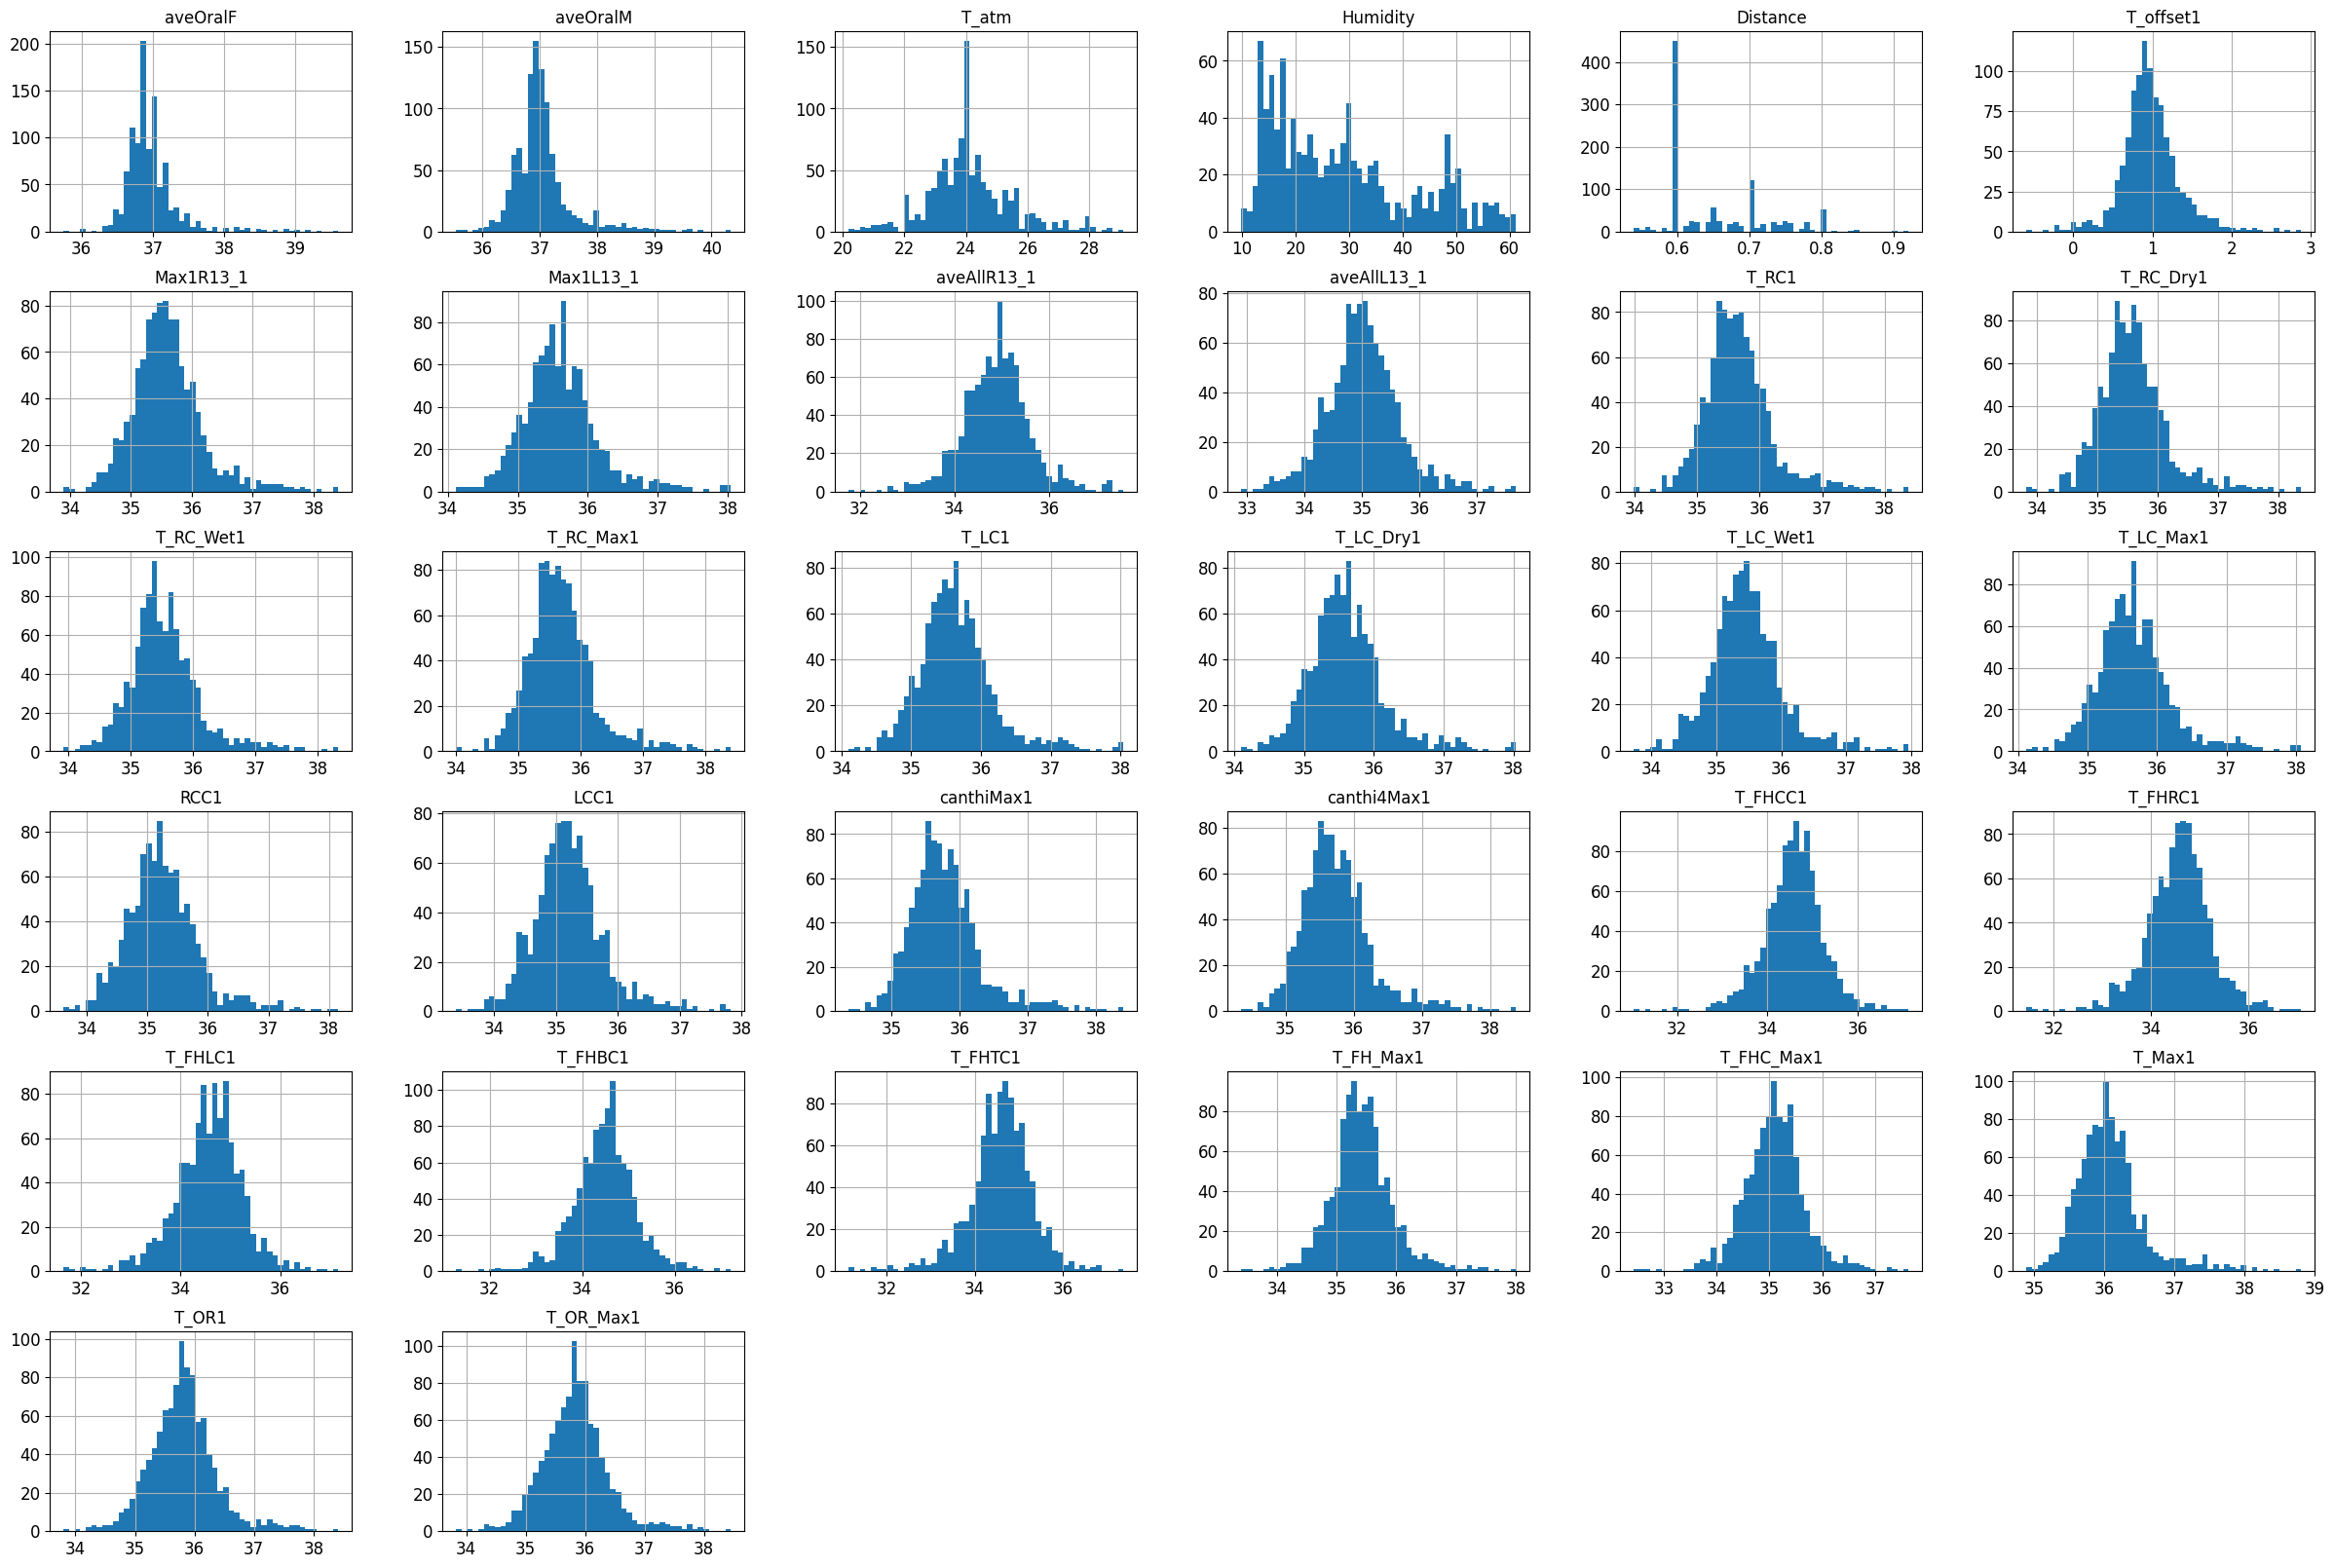

In [79]:
df.hist(bins=50, figsize=(30,20))
plt.show();
# now we can see that tha outlier is removed and the distribution is more visible

In [103]:
# lets see which features are the most correlated ones to the targets
# aveOralF
corr_matrix = df.drop(columns=["SubjectID", "Age", "Gender", "Ethnicity", "aveOralM"]).corr()
corr_matrix["aveOralF"].sort_values(ascending=False)

aveOralF       1.000000
T_Max1         0.752525
T_OR1          0.718765
T_OR_Max1      0.718434
canthiMax1     0.673576
canthi4Max1    0.672954
T_RC_Max1      0.665147
T_RC1          0.664436
T_RC_Wet1      0.654253
T_RC_Dry1      0.644202
Max1R13_1      0.637751
T_LC_Max1      0.633779
T_LC1          0.633606
T_LC_Dry1      0.627878
Max1L13_1      0.621984
RCC1           0.612415
T_LC_Wet1      0.611576
LCC1           0.587250
T_FH_Max1      0.560634
aveAllL13_1    0.542299
aveAllR13_1    0.535784
T_FHC_Max1     0.502439
T_FHBC1        0.472942
T_FHCC1        0.433775
T_FHRC1        0.426092
T_FHLC1        0.399780
T_FHTC1        0.383189
T_offset1      0.117339
T_atm          0.070183
Humidity       0.047089
Distance      -0.064522
Name: aveOralF, dtype: float64

In [104]:
# aveOralM
corr_matrix = df.drop(columns=["SubjectID", "Age", "Gender", "Ethnicity", "aveOralF"]).corr()
corr_matrix["aveOralM"].sort_values(ascending=False)

aveOralM       1.000000
T_Max1         0.849641
canthiMax1     0.784435
canthi4Max1    0.784103
T_RC_Max1      0.769667
T_RC1          0.768933
T_OR1          0.767301
T_OR_Max1      0.766866
T_RC_Wet1      0.760235
T_LC_Max1      0.751006
T_LC1          0.750874
T_RC_Dry1      0.749061
T_LC_Dry1      0.744085
Max1R13_1      0.742400
Max1L13_1      0.736108
T_LC_Wet1      0.720822
RCC1           0.714787
LCC1           0.697335
aveAllL13_1    0.646655
T_FH_Max1      0.642132
aveAllR13_1    0.622298
T_FHC_Max1     0.595648
T_FHBC1        0.552743
T_FHRC1        0.514403
T_FHCC1        0.513619
T_FHLC1        0.463668
T_FHTC1        0.455075
T_offset1      0.138731
T_atm          0.098233
Humidity       0.063515
Distance      -0.067224
Name: aveOralM, dtype: float64

<Axes: xlabel='aveOralF', ylabel='aveOralM'>

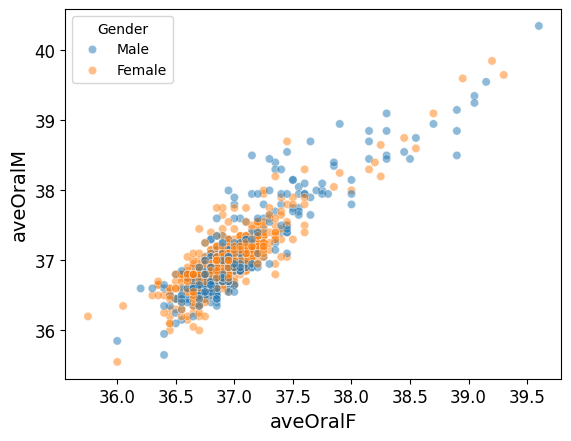

In [114]:
# lets explore the correlation between targets and features
# we can see the T_Max1 is the number one feature which has the most correlation
sns.scatterplot(x=df.aveOralF, y=df.aveOralM, alpha=0.5, hue=df.Gender)

In [115]:
# it is obviously shown that aveOralM and aveOralF has a really strong positive correlation with each other
# so Firstly, I want to predict one of them like aveOralM, then with a simple LinearRegression predict the other.

## Prepare the DataFrame for Machine Learning Algorithms

#### Mnual steps to prepare data for applying machine learning algorithms

In [202]:
df_copy = df.copy()
df_copy.head(2)

,SubjectID,aveOralF,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,161117-1,36.85,36.59,Male,41-50,White,24.0,28.0,0.8,0.7025,35.03,35.3775,34.40,34.9175,34.985,34.9850,34.7625,35.0325,35.3375,35.3375,34.485,35.3775,34.7850,34.465,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,161117-2,37.00,37.19,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.55,34.5200,33.93,34.2250,34.710,34.6325,34.6400,34.7425,34.5600,34.5375,34.350,34.5750,34.3225,34.240,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075


In [204]:
# drop oveOralF, because I want to predict aveOralM, and drop SubjectID because it's useless
prepared_df = df_copy.drop(columns=["aveOralF", "SubjectID"])
prepared_df.head(2)

,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,36.59,Male,41-50,White,24.0,28.0,0.8,0.7025,35.03,35.3775,34.40,34.9175,34.985,34.9850,34.7625,35.0325,35.3375,35.3375,34.485,35.3775,34.7850,34.465,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,37.19,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.55,34.5200,33.93,34.2250,34.710,34.6325,34.6400,34.7425,34.5600,34.5375,34.350,34.5750,34.3225,34.240,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075


In [181]:
#train_set = prepared_df.drop(columns=["aveOralM"])
#labels = prepared_df["aveOralM"]

In [169]:
#### -----> adding new possible potential features
#train_set['generated_temp_diff_RC_LC'] = train_set['T_RC1'] - train_set['T_LC1']  # Difference between right and left cheek
#train_set['generated_temp_diff_forehead_mouth'] = train_set['T_FHTC1'] - train_set['T_OR1']  # Difference between forehead and mouth
#train_set['generated_temp_ratio_RC_LC'] = train_set['T_RC1'] / train_set['T_LC1']  # Ratio of right cheek to left cheek temperature
#train_set['generated_temp_ratio_forehead_max'] = train_set['T_FH_Max1'] / train_set['T_Max1']  # Ratio of forehead max to overall max
#train_set['generated_avg_temp_face'] = (train_set['T_RC1'] + train_set['T_LC1'] + train_set['T_OR1']) / 3  # Average temperature of face region
#train_set['generated_max_temp_forehead'] = train_set[['T_FHRC1', 'T_FHLC1', 'T_FHCC1']].max(axis=1)  # Max temperature in forehead region
#train_set['generated_norm_temp_RC1'] = (train_set['T_RC1'] - train_set['T_atm']) / train_set['T_atm']  # Normalized right cheek temperature
#train_set['generated_norm_temp_max'] = (train_set['T_Max1'] - train_set['T_atm']) / train_set['T_atm']  # Normalized overall max temperature
#train_set['generated_temp_offset_humidity'] = train_set['T_offset1'] * train_set['Humidity']  # Interaction of temperature difference and humidity
#train_set['generated_dist_max_temp'] = train_set['Distance'] * train_set['T_Max1']  # Interaction of distance and overall max temperature

In [171]:
#### ----> Encoding Categorical Variables
#train_set = pd.get_dummies(train_set)

In [172]:
#### ----> normalize the dataframe
#scaler = StandardScaler()
#train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=train_set.columns)

In [182]:
#### ----> check duplicates
#train_set.duplicated().any()

## Using Pipeline to Transformation

In [257]:
# Assuming train_set is your DataFrame
# Define the function to generate new features
def generate_additional_features(X_copy):
    # Generate additional features
    X_copy['generated_temp_diff_RC_LC'] = X_copy['T_RC1'] - X_copy['T_LC1']
    X_copy['generated_temp_diff_forehead_mouth'] = X_copy['T_FHTC1'] - X_copy['T_OR1']
    X_copy['generated_temp_ratio_RC_LC'] = X_copy['T_RC1'] / X_copy['T_LC1']
    X_copy['generated_temp_ratio_forehead_max'] = X_copy['T_FH_Max1'] / X_copy['T_Max1']
    X_copy['generated_avg_temp_face'] = (X_copy['T_RC1'] + X_copy['T_LC1'] + X_copy['T_OR1']) / 3
    X_copy['generated_max_temp_forehead'] = X_copy[['T_FHRC1', 'T_FHLC1', 'T_FHCC1']].max(axis=1)
    X_copy['generated_norm_temp_RC1'] = (X_copy['T_RC1'] - X_copy['T_atm']) / X_copy['T_atm']
    X_copy['generated_norm_temp_max'] = (X_copy['T_Max1'] - X_copy['T_atm']) / X_copy['T_atm']
    X_copy['generated_temp_offset_humidity'] = X_copy['T_offset1'] * X_copy['Humidity']
    X_copy['generated_dist_max_temp'] = X_copy['Distance'] * X_copy['T_Max1']
    return X_copy


# Define the numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with the median if any
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Define the ColumnTransformer to apply different transformations to numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the pipeline including preprocessing steps and feature generation step
pipeline = Pipeline(steps=[
    ('feature_generation', FunctionTransformer(generate_additional_features)),
    ('preprocessor', preprocessor)
])

# Apply the pipeline to the dataset
prepared_df = pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(prepared_df, y, test_size=0.2, random_state=42)

## Train and Evaluate Machine Learning Models

#### 1. Simple Linear Regression

In [281]:
# fitting a simple linear regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [282]:
# let's try the full preprocessing pipeline on a few training instances

some_data = X[:5]
some_labels = y[:5]
some_data_prepared = pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [36.63426948 36.28435493 37.02374148 36.88365912 36.83904243]
Labels: [36.59, 37.19, 37.34, 37.09, 37.04]


/var/folders/hs/ghq1kglj2js5typ6kb2qg6xm0000gn/T/ipykernel_8691/747760428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_copy['generated_temp_diff_RC_LC'] = X_copy['T_RC1'] - X_copy['T_LC1']
/var/folders/hs/ghq1kglj2js5typ6kb2qg6xm0000gn/T/ipykernel_8691/747760428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_copy['generated_temp_diff_forehead_mouth'] = X_copy['T_FHTC1'] - X_copy['T_OR1']
/var/folders/hs/ghq1kglj2js5typ6kb2qg6xm0000gn/T/ipykernel_8691/747760428.py:7: SettingWithCopyWarning: 


In [293]:
# let's see what rmse error the linear regression achieves on the training set

from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"Linera Regression MSE: {lin_mse}")
print(round(lin_rmse, 2))

Linera Regression MSE: 0.056785682646013726
0.24


In [284]:
# onother useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, predictions)
print(round(lin_mae, 2))

0.19


---

### 2.K-Nearest Neighbour Regression

In [275]:
# fitting a simple nearest neighbour regression

from sklearn.neighbors import KNeighborsRegressor

neigh_reg = KNeighborsRegressor(n_neighbors=1)
neigh_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [294]:
# let's see what rmse error the nerest neighbour model achieves on training set;
# we can see here that this model clearly overfits the training set due to a 0 error on training set;

predictions = neigh_reg.predict(X_test)
neigh_mse = mean_squared_error(y_test, predictions)
neigh_rmse = np.sqrt(neigh_mse)
neigh_rmse
print(f"KNN MSE: {neigh_mse}")

KNN MSE: 0.1135049019607845


---

### 3. Decision Tree

In [277]:
# fitting a simple decision tree with depth 3

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [291]:
# let's see what rmse error the decision tree achieves on training set;
# this is a capable model which can capture non-linear patterns in the data;

predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
print(f"Decision Tree MSE: {tree_mse}")
print(round(tree_rmse, 2))

Decision Tree MSE: 0.11357843137254924
0.34


---

### 4.Random Forest

In [279]:
# fitting a simple random forest model consisting of an ensemble of 100 trees (n_estimators) here
# whose predictions are averaged by the random forest model;
# ensemble models, in particular random forests, are powerful as they combine the results produced by several models

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [290]:
# evaluating the random forest model on the testing set;

predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, predictions)
forest_rmse = np.sqrt(forest_mse)
print(f"Random Forest MSE: {forest_mse}")
print(round(forest_rmse, 2))

Random Forest MSE: 0.05527584926470567
0.24


---

# 4. XGBoost Algorithm

In [286]:
!pip install xgboost 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 384.6 kB/s eta 0:00:00m eta 0:00:010:00:01


In [288]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.061574157622678205


#### Compare Regression Algorithms

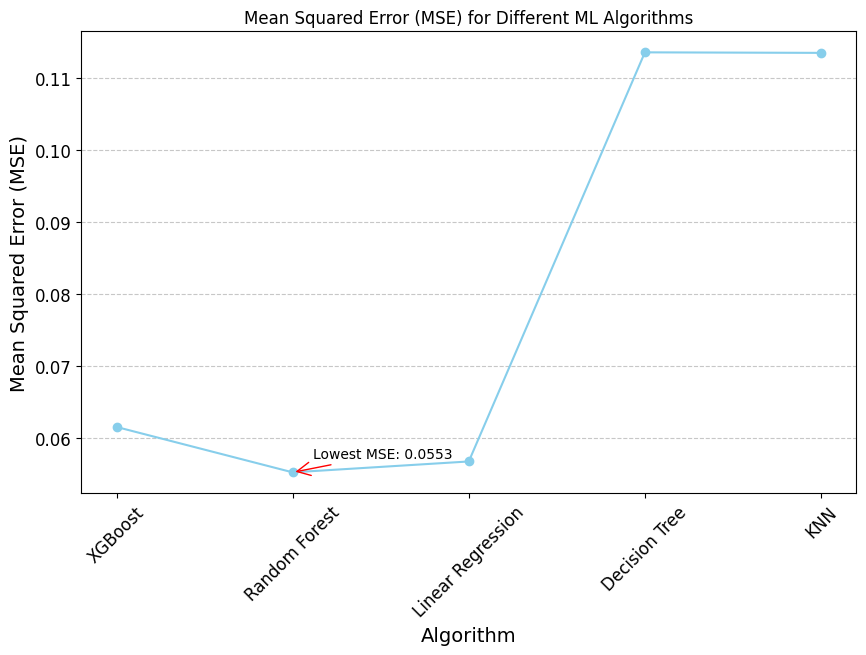

In [311]:
# Create a DataFrame to store MSE values for different algorithms
data = {
    'Algorithm': ['XGBoost', 'Random Forest', 'Linear Regression', 'Decision Tree', 'KNN'],
    'MSE': [0.061574157622678205, 0.05527584926470567, 0.056785682646013726, 0.11357843137254924, 0.1135049019607845]
}

df = pd.DataFrame(data)

# Plot the MSE values with a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Algorithm'], df['MSE'], marker='o', color='skyblue', linestyle='-')
plt.title('Mean Squared Error (MSE) for Different ML Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Find the index of the lowest MSE value
lowest_mse_index = df['MSE'].idxmin()
lowest_mse_algorithm = df.loc[lowest_mse_index, 'Algorithm']
lowest_mse_value = df.loc[lowest_mse_index, 'MSE']

# Annotate the lowest MSE value on the plot
plt.annotate(f'Lowest MSE: {lowest_mse_value:.4f}', 
             xy=(lowest_mse_algorithm, lowest_mse_value), 
             xytext=(15, 10), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red', mutation_scale=24))

plt.show()

In [312]:
# so here we can see that the Random Forest has the lowest MSE in prediction

### now let's predict the OralF using Random Forest Algorithm

In [337]:
df_copy = df.copy()
prepared_df = df_copy.drop(columns=["aveOralM", "SubjectID"])

In [339]:
prepared_df.head(2)

,aveOralF,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,36.85,Male,41-50,White,24.0,28.0,0.8,0.7025,35.03,35.3775,34.40,34.9175,34.985,34.9850,34.7625,35.0325,35.3375,35.3375,34.485,35.3775,34.7850,34.465,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,37.00,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.55,34.5200,33.93,34.2250,34.710,34.6325,34.6400,34.7425,34.5600,34.5375,34.350,34.5750,34.3225,34.240,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075


In [340]:
# Apply the pipeline to the dataset
prepared_df = pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(prepared_df, y, test_size=0.2, random_state=42)

/var/folders/hs/ghq1kglj2js5typ6kb2qg6xm0000gn/T/ipykernel_8691/747760428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_copy['generated_temp_diff_RC_LC'] = X_copy['T_RC1'] - X_copy['T_LC1']
/var/folders/hs/ghq1kglj2js5typ6kb2qg6xm0000gn/T/ipykernel_8691/747760428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_copy['generated_temp_diff_forehead_mouth'] = X_copy['T_FHTC1'] - X_copy['T_OR1']


In [341]:
# fitting a simple random forest model consisting of an ensemble of 100 trees (n_estimators) here
# whose predictions are averaged by the random forest model;
# ensemble models, in particular random forests, are powerful as they combine the results produced by several models

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [342]:
# evaluating the random forest model on the testing set;

predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, predictions)
forest_rmse = np.sqrt(forest_mse)
print(f"Random Forest MSE: {forest_mse}")
print(round(forest_rmse, 2))

Random Forest MSE: 0.054525716299019714
0.23


In [343]:
aveOralF = forest_reg.predict(X_train)

In [344]:
y_train.shape
aveOralM.shape

(816,)

In [346]:
# aveOralF, aveOralM
aveOralF

array([[36.8245, 36.973 ],
       [37.0675, 36.8825],
       [38.8475, 39.3335],
       ...,
       [36.999 , 36.995 ],
       [36.923 , 37.1005],
       [36.873 , 37.1795]])

---

# Classification Task

In [358]:
df.head(2)

,SubjectID,aveOralF,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,161117-1,36.85,36.59,Male,41-50,White,24.0,28.0,0.8,0.7025,35.03,35.3775,34.40,34.9175,34.985,34.9850,34.7625,35.0325,35.3375,35.3375,34.485,35.3775,34.7850,34.465,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,161117-2,37.00,37.19,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.55,34.5200,33.93,34.2250,34.710,34.6325,34.6400,34.7425,34.5600,34.5375,34.350,34.5750,34.3225,34.240,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075


In [359]:
## Define the target label based on the oral temperature
df['has_fever'] = (df['aveOralF'] >= 37.5) | (df['aveOralM'] >= 37.5)

In [360]:
df.has_fever.value_counts()

has_fever
False    906
True     114
Name: count, dtype: int64

In [361]:
X = df.drop(columns=['has_fever', 'SubjectID'])
y = df['has_fever']

In [362]:
prepared_df = pipeline.fit_transform(X)

In [363]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(prepared_df, y, test_size=0.2, random_state=42)

### 1.Random Forest

In [366]:
# Train a machine learning model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.9558823529411765


### 2.Logistic Regression

In [367]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make prediction on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model's accuracy
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

Logistic Regression Accuracy: 0.9607843137254902


### 3. Support Vector Machine

In [368]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make prediction on the testing set
y_pred = svm_model.predict(X_test)

# Evalueate the model's accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.9656862745098039


### 4.Decision Tree

In [369]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make prediction on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.9558823529411765


## Measurements

                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0           Random Forest  0.955882   0.800000  0.833333  0.816327  0.902778   
1     Logistic Regression  0.960784   0.863636  0.791667  0.826087  0.887500   
2  Support Vector Machine  0.965686   0.904762  0.791667  0.844444  0.890278   
3           Decision Tree  0.955882   0.758621  0.916667  0.830189  0.938889   

     AUC-PR  
0  0.686275  
1  0.708222  
2  0.740780  
3  0.705206  


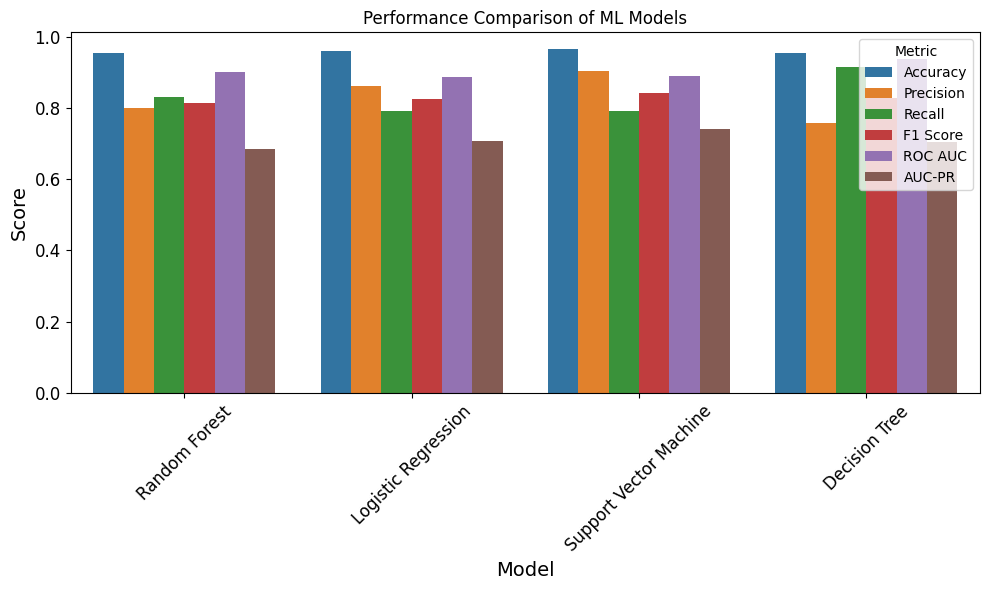

In [373]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score


# Train machine learning models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': [], 'AUC-PR': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_pred)
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)
    results['AUC-PR'].append(pr_auc)

# Create a DataFrame from results
results_df = pd.DataFrame(results)
print(results_df)

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Performance Comparison of ML Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


TypeError: 'numpy.float64' object is not callable

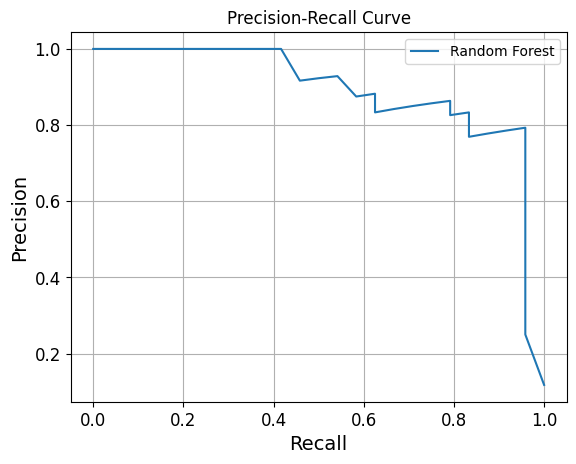

In [381]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Train machine learning models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42, probability=True),  # Enable probability estimates
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': [], 'AUC-PR': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for positive class
    
    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    auc_pr = auc(recall, precision)
    
    # Calculate other classification metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_score = precision_score(y_test, y_pred)
    recall_score = recall_score(y_test, y_pred)
    f1_score = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision_score)
    results['Recall'].append(recall_score)
    results['F1 Score'].append(f1_score)
    results['ROC AUC'].append(roc_auc)
    results['AUC-PR'].append(auc_pr)

    # Plot precision-recall trade-off
    plt.plot(recall, precision, label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)

# Plot ROC curve
plt.figure()
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=name + ' (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)

# Create a DataFrame from results
results_df = pd.DataFrame(results)
print(results_df)
